In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm #for data normilization
#from sklearn.preprocessing import StandardScaler #for standarise the data 
from scipy import stats
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

In [6]:
df = pd.read_csv('coaster_db.csv')

In [7]:
df.shape # to show shape of the column

(1087, 56)

In [8]:
df.head(5) 

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [9]:
df.columns # to show all column names

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [10]:
df.dtypes #t0o show data types of the columns

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [11]:
df.describe() #shows statical information of the nurmecal data in the data frame

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


# data preperation

In [12]:
# removing unwanted columns

In [13]:
#type 1

In [14]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [15]:
df_clean = df[['coaster_name', 
    #'Length', 'Speed', 
    'Location', 
    #'Status', 
    'Opening date',
      # 'Type', 
    'Manufacturer', 
    #'Height restriction', 'Model', 'Height',
     #  'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
      # 'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       #'Track layout', 'Fastrack available', 'Soft opening date.1',
    #   'Closing date', 
    'Opened', 
    #'Replaced by', 'Website',
       #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       #'Single rider line available', 'Restraint Style',
       #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',   
    'speed_mph',
    # 'height_value', 'height_unit', 
    'height_ft',
       'Inversions_clean', 'Gforce_clean']]

In [16]:
df_clean

,coaster_name,Location,Opening date,Manufacturer,Opened,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,"June 16, 1884",LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,1895,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,NaN,1895,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,1901,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,1901,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,2022,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,"June 16, 2016",Vekoma,NaN,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,NaN,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaN,34.0,NaN,0,NaN


In [17]:
#type 2

In [18]:
# df2=df.drop(['Opening date'],axis=1)

In [19]:
df = df_clean

In [20]:
df.shape

(1087, 14)

In [21]:
df.dtypes

coaster_name           object
Location               object
Opening date           object
Manufacturer           object
Opened                 object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [22]:
#to change data type of the columns

In [23]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [24]:
df.dtypes

coaster_name                  object
Location                      object
Opening date                  object
Manufacturer                  object
Opened                        object
year_introduced                int64
latitude                     float64
longitude                    float64
Type_Main                     object
opening_date_clean    datetime64[ns]
speed_mph                    float64
height_ft                    float64
Inversions_clean               int64
Gforce_clean                 float64
dtype: object

In [25]:
#to rename columns

In [26]:
df.columns = df.columns.str.replace(' ', '_')

In [27]:
# example1 df.rename(columns={'coaster_name' = 'Coaster_Name'})

In [28]:
type(df.columns)

pandas.core.indexes.base.Index

In [29]:
LON = list(df)

In [30]:
LNN = [L.capitalize() for L in LON]

In [31]:
LNN

['Coaster_name',
 'Location',
 'Opening_date',
 'Manufacturer',
 'Opened',
 'Year_introduced',
 'Latitude',
 'Longitude',
 'Type_main',
 'Opening_date_clean',
 'Speed_mph',
 'Height_ft',
 'Inversions_clean',
 'Gforce_clean']

In [32]:
dit = res = dict(zip(LON, LNN))

In [33]:
df = df.rename(columns=dit) #changing column name

In [34]:
df

,Coaster_name,Location,Opening_date,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,"June 16, 1884",LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,1895,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,1901,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,1901,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,2022,Intamin,NaN,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
1084,Tron Lightcycle Power Run,Other,"June 16, 2016",Vekoma,NaN,2022,NaN,NaN,Steel,2016-06-16,59.3,NaN,0,4.0
1085,Tumbili,Kings Dominion,NaN,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [35]:
#to find null values

In [36]:
df.isna()

,Coaster_name,Location,Opening_date,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
0,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,False,False,False,False,True,False,False,False,False,False,True,True,False,False
2,False,False,True,True,False,False,False,False,False,True,True,True,False,True
3,False,False,False,False,True,False,False,False,False,False,True,True,False,True
4,False,False,False,False,True,False,False,False,False,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,False,False,True,False,True,False,True,True,False,True,False,True,False,False
1083,False,False,False,False,True,False,False,False,False,False,False,True,False,True
1084,False,False,False,False,True,False,True,True,False,False,False,True,False,False
1085,False,False,True,False,True,False,True,True,False,True,False,True,False,True


In [37]:
df.isna().sum()

Coaster_name             0
Location                 0
Opening_date           250
Manufacturer            59
Opened                1060
Year_introduced          0
Latitude               275
Longitude              275
Type_main                0
Opening_date_clean     250
Speed_mph              150
Height_ft              916
Inversions_clean         0
Gforce_clean           725
dtype: int64

In [38]:
#to find Dupilcate data 
df.loc[df.duplicated()]

,Coaster_name,Location,Opening_date,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean


In [39]:
#duplicated in coluns (subset)

In [40]:
df.duplicated(subset=['Coaster_name'])

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [41]:
df.loc[df.duplicated(subset=['Coaster_name'])]

,Coaster_name,Location,Opening_date,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
43,Crystal Beach Cyclone,Crystal Beach Park,1926,Traver Engineering,NaN,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,1911,Fred W. Pearce,NaN,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,"May 23, 1938",NaN,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,NaN,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,"May 23, 1981 as Blauer Enzian, 1986 as Thunder...",Mack Rides,NaN,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,1999 as Road Runner Railway; 2021 as Lil' Devi...,Zamperla,NaN,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,1950s,Allan Herschell Company,NaN,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,NaN,Rocky Mountain Construction,NaN,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [42]:
# example to find the element that is duplicated

In [43]:
df.query('Coaster_name =="American Dreier Looping"')

,Coaster_name,Location,Opening_date,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
422,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,1997,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
686,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2005,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
738,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2007,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,NaN,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [44]:
#remove duplicate

In [45]:
#to find first instanct of the record

In [46]:
df = df.sort_values(by='Year_introduced', ascending=True)

In [47]:
df

,Coaster_name,Location,Opening_date,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,"June 16, 1884",LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,1895,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,1901,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,1901,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,ArieForce One,Fun Spot America Atlanta,2022,Rocky Mountain Construction,NaN,2022,NaN,NaN,Steel,2022-01-01,64.0,NaN,4,3.75
1072,Aquaman: Power Wave,Six Flags Over Texas,2022[1],Mack Rides,NaN,2022,32.7560,-97.0710,Steel,2022-01-01,62.1,NaN,0,NaN
1085,Tumbili,Kings Dominion,NaN,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN
1078,Guardians of the Galaxy: Cosmic Rewind,Epcot,2022,Vekoma,NaN,2022,NaN,NaN,Steel,2022-01-01,NaN,NaN,0,NaN


In [48]:
~df.duplicated(subset=['Coaster_name','Location','Opening_date'])

0       True
1       True
2       True
3       True
4       True
        ... 
1073    True
1072    True
1085    True
1078    True
1086    True
Length: 1087, dtype: bool

In [49]:
df = df.loc[~df.duplicated(subset=['Coaster_name','Location','Opening_date'])].reset_index(drop=True)

In [50]:
df

,Coaster_name,Location,Opening_date,Manufacturer,Opened,Year_introduced,Latitude,Longitude,Type_main,Opening_date_clean,Speed_mph,Height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,"June 16, 1884",LaMarcus Adna Thompson,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,1895,Lina Beecher,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",NaN,NaN,1895,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,1901,Edwin Prescott,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,1901,Edwin Prescott,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,ArieForce One,Fun Spot America Atlanta,2022,Rocky Mountain Construction,NaN,2022,NaN,NaN,Steel,2022-01-01,64.0,NaN,4,3.75
986,Aquaman: Power Wave,Six Flags Over Texas,2022[1],Mack Rides,NaN,2022,32.7560,-97.0710,Steel,2022-01-01,62.1,NaN,0,NaN
987,Tumbili,Kings Dominion,NaN,S&S – Sansei Technologies,NaN,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN
988,Guardians of the Galaxy: Cosmic Rewind,Epcot,2022,Vekoma,NaN,2022,NaN,NaN,Steel,2022-01-01,NaN,NaN,0,NaN


# Analysis

In [51]:
df['Year_introduced'].value_counts()

1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: Year_introduced, Length: 101, dtype: int64

In [52]:
#Top 10 Years Coaster Introduced

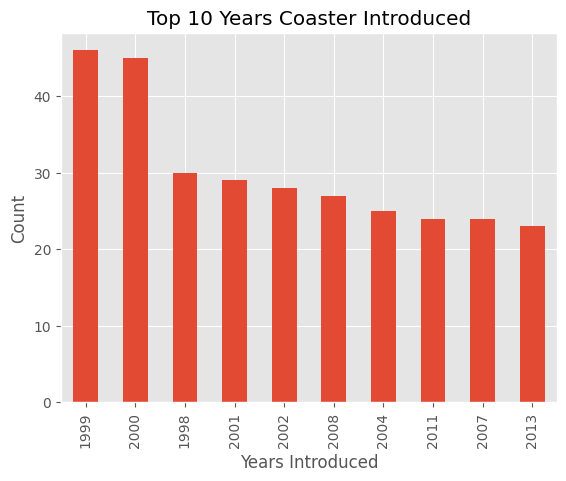

In [53]:
ax = df['Year_introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Coaster Introduced')
ax.set_xlabel('Years Introduced')
ax.set_ylabel('Count')
plt.show()

In [54]:
#Coaster Speed distribution

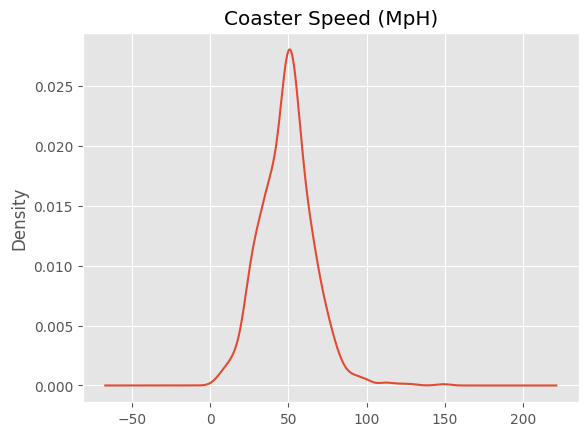

In [55]:
ax = df['Speed_mph'].plot(kind='kde',title='Coaster Speed (MpH)')

In [56]:
#Speed Vs Hight 

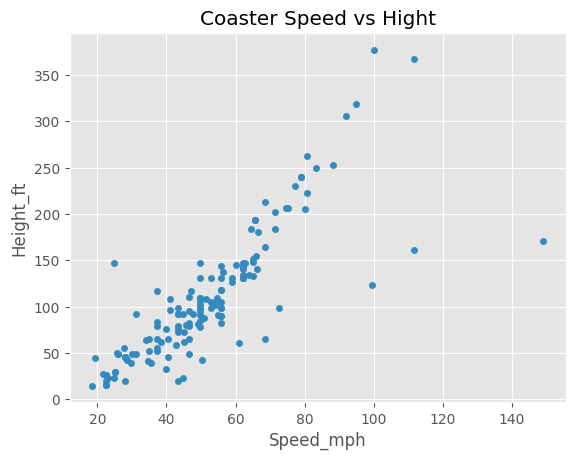

In [57]:
ax = df.plot(kind='scatter',x='Speed_mph',y='Height_ft',title='Coaster Speed vs Hight')

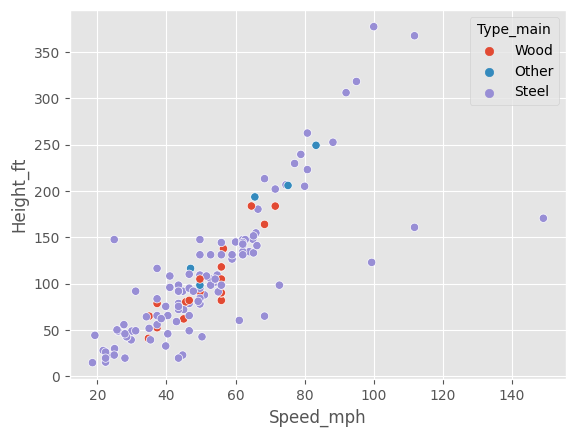

In [58]:
#using Seaborn
ax = sns.scatterplot(x='Speed_mph',y='Height_ft',data=df,hue='Type_main')

In [59]:
#pair plots used to compare multiple fields

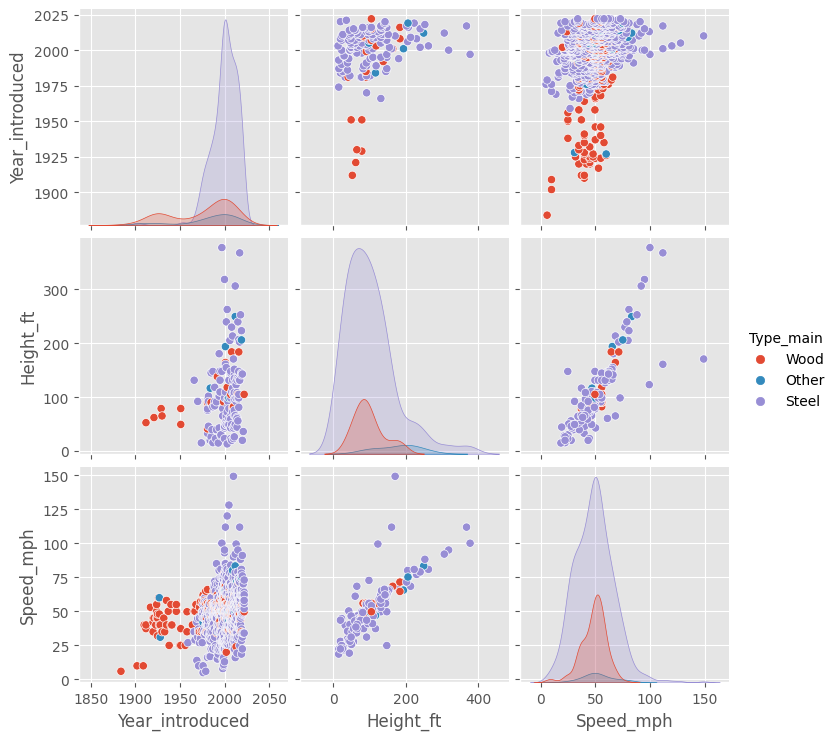

In [60]:
aa = sns.pairplot(df,vars=['Year_introduced','Height_ft','Speed_mph'],hue = 'Type_main')

In [61]:
#Correlation 

In [62]:
df_corr = df[['Year_introduced','Speed_mph',
    'Height_ft','Inversions_clean','Gforce_clean']].dropna().corr()

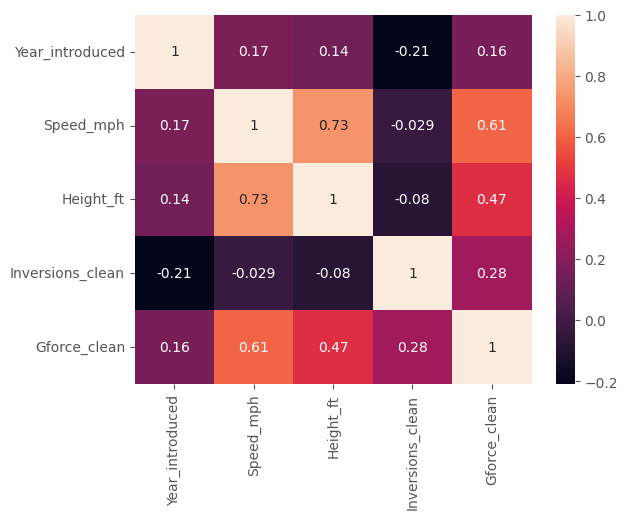

In [63]:
sns.heatmap(df_corr, annot=True)
plt.show()

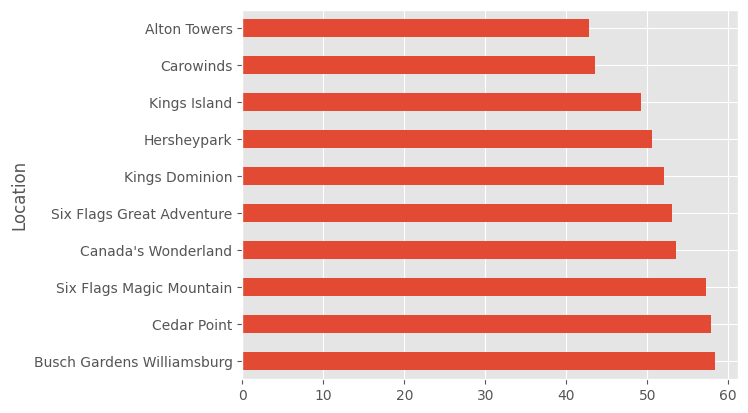

In [64]:
#Avg coaster speed by location
df.query('Location != "Other"').groupby('Location')['Speed_mph'].agg(['mean','count']).query('count >= 10').sort_values('mean',ascending=False)['mean'].plot(kind='barh')
plt.show()
